In [9]:
!pip install biopython



In [15]:
#Import necessary packages
from pyfaidx import Fasta

import os
os.getcwd()
os.chdir(r"C:\Users\malak\Desktop\bioinfomratics")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [11]:
genes= Fasta("genes.fasta")


In [12]:
from Bio import SeqIO

sequences = []
for seq_record in SeqIO.parse("genes.fasta", "fasta"):
    sequences.append(seq_record.seq)

In [13]:
sequences

[Seq('ATGGTCAGCTGGGGTCGTTTCATCTGCCTGGTCGTGGTCACCATGGCAACCTTG...TAA'),
 Seq('ATGACATCATTTTCCACCTCTGCTCAGTGTTCAACATCTGACAGTGCTTGCAGG...CTC'),
 Seq('ATGACATCATTTTCCACCTCTGCTCAGTGTTCAACATCTGACAGTGCTTGCAGG...CTC'),
 Seq('CCCCGCCCCTCTGGCGGCCCGCCGTCCCAGACGCGGGAAGAGCTTGGCCGGTTT...AAA'),
 Seq('CCCCGCCCCTCTGGCGGCCCGCCGTCCCAGACGCGGGAAGAGCTTGGCCGGTTT...AAA'),
 Seq('CCCCGCCCCTCTGGCGGCCCGCCGTCCCAGACGCGGGAAGAGCTTGGCCGGTTT...AAA'),
 Seq('CCCCGCCCCTCTGGCGGCCCGCCGTCCCAGACGCGGGAAGAGCTTGGCCGGTTT...AAA'),
 Seq('CCCCGCCCCTCTGGCGGCCCGCCGTCCCAGACGCGGGAAGAGCTTGGCCGGTTT...AAA'),
 Seq('CCCCGCCCCTCTGGCGGCCCGCCGTCCCAGACGCGGGAAGAGCTTGGCCGGTTT...AAA'),
 Seq('CCCCGCCCCTCTGGCGGCCCGCCGTCCCAGACGCGGGAAGAGCTTGGCCGGTTT...AAA'),
 Seq('CCCCGCCCCTCTGGCGGCCCGCCGTCCCAGACGCGGGAAGAGCTTGGCCGGTTT...AAA'),
 Seq('GTGCTGGGACTACAGAGTCCAGTGTCGTGCTGCTGCAGGAGCACCCCTGCCTGG...TAA'),
 Seq('ACCGGATGCTCGGCATGAACCACTAGGCGCCTGGCGGGGGTGATCTGTCGGAGC...TAA'),
 Seq('TCTGTCGGAGCGACCGGCTTGGCGCCTGCCTGTCCCCAGCCCCTCTCAGCTTGA...TAA'),
 Seq('GCGACCGGCTTGGC

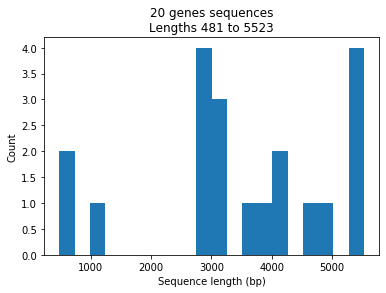

In [26]:
sizes = [len(rec) for rec in sequences]

plt.hist(sizes, bins=20)
plt.title(f"{len(sizes)} genes sequences\nLengths {min(sizes)} to {max(sizes)}")
plt.xlabel("Sequence length (bp)")
plt.ylabel("Count")
plt.show()

In [27]:
from Bio.SeqUtils import GC
gc_values = sorted(GC(rec) for rec in sequences)

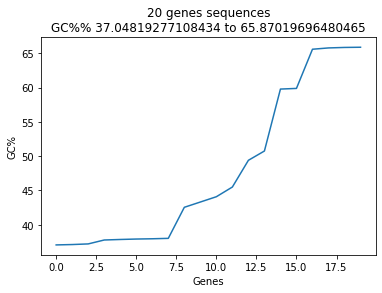

In [39]:
plt.plot(gc_values)
plt.title(f"{len(gc_values)} genes sequences\nGC%% {min(gc_values)} to {max(gc_values)}")
plt.xlabel("Genes")
plt.ylabel("GC%")
plt.show()


In [34]:
#Bonus question 
#RNA SEQ Heat map
import seaborn as sns
import csv
#Loading data
rna_seq = pd.read_csv('RNASeq.csv',index_col=0)
rna_seq.head()

,Control_1,Control_2,Control_3,Condition_1_1,Condition_1_2,Condition_1_3,Condition_2_1,Condition_2_2,Condition_2_3
Gene_Symbol,,,,,,,,,
HERC5,2.35,2.18,1.90,3.41,2.99,3.25,2.67,2.55,2.46
IFIT1,4.50,4.42,4.58,6.31,6.26,6.23,6.08,5.52,5.21
IFIT2,4.34,4.84,4.76,5.91,5.96,5.95,5.56,5.36,4.97
IFNA4,1.42,1.52,1.44,1.73,2.05,2.35,1.14,1.54,1.61
IFNA7,0.88,1.22,0.56,1.46,1.23,1.70,1.23,0.71,0.64


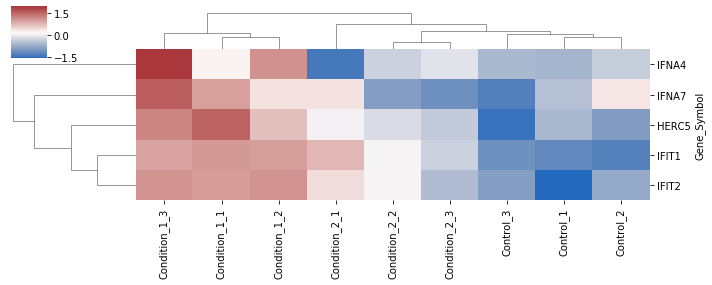

In [38]:
# Packages to plot clustergram
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar
 
# Plot clustergram
g = sns.clustermap(rna_seq, z_score=0, cmap="vlag", figsize=(10, 4), method='average', cbar_kws={"ticks":[-1.5,0,1.5]})
g